In [2]:
"""# Churn Prediction: Data preprocessing"""

# Data Preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
dataset = pd.read_csv('./Churn.csv')

# Extract features (X) and target (Y)
X = dataset.iloc[:, 3:13].values
Y = dataset.iloc[:, 13].values

# Convert categorical data to numerical data

# Encode the 'Geography' column
labelencoder1 = LabelEncoder()
X[:, 1] = labelencoder1.fit_transform(X[:, 1])

# Encode the 'Gender' column
labelencoder2 = LabelEncoder()
X[:, 2] = labelencoder2.fit_transform(X[:, 2])


# Apply One-Hot Encoding to the 'Geography' column
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X)

# Remove dummy variable trap (optional, but recommended)
X = X[:, 1:]

In [3]:
"""# Churn Prediction: Training/Test data creation"""

# Creation of training and test sets
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Standardization
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
"""# Churn Prediction: Model construction"""

# Creation of the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model, Sequential

# Initialize the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform',
                     activation='relu', input_dim=11))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform',
                     activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
"""# Churn Prediction: Model fitting and Evaluation on the Test observations"""

# Training the network
classifier.compile(optimizer='adam', loss='binary_crossentropy',
                     metrics=['accuracy'])

# Train the classifier
classifier.fit(X_train, y_train, epochs=100)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Print Statistics from Confusion Matrix
from sklearn.metrics import classification_report

# Print the classification report
target_names = ['Stay', 'Leave']
print(classification_report(y_test, y_pred, target_names=target_names))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7869 - loss: 0.6563
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.4429
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8030 - loss: 0.4264
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8174 - loss: 0.4193
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8284 - loss: 0.4161
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8308 - loss: 0.4174
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8375 - loss: 0.3978
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8319 - loss: 0.4107
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8375 - loss: 0.4036
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8353 - loss: 0.4033
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8294 - loss: 0.4135
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [5]:
"""# Adding Dropout to the Neural Network"""
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 11))
classifier.add(Dropout(0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform',
                     activation = 'relu'))
classifier.add(Dropout(0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                     activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
metrics = ['accuracy'])

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Adding dropout is simple: it is a layer that you add after a hidden dense layer. The 'p' parameter is the dropout probability (i.e., the probability of «silencing» the neurons in the previous layer).
- Nothing will change in the remaining parts of the code.

In [9]:
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.3.1

# https://stackoverflow.com/questions/79290968/super-object-has-no-attribute-sklearn-tags

In [1]:
# Print version of scikit-learn
import sklearn
print(sklearn.__version__)

1.3.1


In [5]:
"""# Cross Validation"""
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier      - deprecated

# %pip install scikeras[tensorflow]
# %pip install -U scikit-learn

from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform',
                         activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform',
                         activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                         activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier

classifier = KerasClassifier(model=build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1, verbose = 1)
mean = accuracies.mean()
variance = accuracies.std()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.3min finished


In [ ]:
# """# Tuning of the Parameters"""
# from sklearn.model_selection import GridSearchCV

# def build_classifier(optimizer='adam'):
#     classifier = Sequential()
#     classifier.add(Dense(units = 6, kernel_initializer = 'uniform',
#                          activation = 'relu', input_dim = 11))
#     classifier.add(Dense(units = 6, kernel_initializer = 'uniform',
#                          activation = 'relu'))
#     classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
#                          activation = 'sigmoid'))
#     classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier

# classifier = KerasClassifier(model = build_classifier)

# parameters = {'batch_size': [25, 32],
#               'epochs': [100, 500],
#               'optimizer': ['adam', 'rmsprop']}                # Combinations of parameters to try = 2 * 2 * 2 = 8

# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10)

# grid_search = grid_search.fit(X_train, y_train)               #### Time of Execution = +10min
# best_parameters = grid_search.best_params_
# best_accuracy = grid_search.best_score_

Epoch 1/100


c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7801 - loss: 0.6538
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7950 - loss: 0.4428
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8109 - loss: 0.4173
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8151 - loss: 0.4023
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8251 - loss: 0.3843
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8415 - loss: 0.3849
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8529 - loss: 0.3657
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8520 - loss: 0.3668
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8626 - loss: 0.3461
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8621 - loss: 0.3363
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8548 - loss: 0.3533
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7774 - loss: 0.6457
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7894 - loss: 0.4520
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7923 - loss: 0.4370
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7966 - loss: 0.4297
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 0.4257
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7882 - loss: 0.4394
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7918 - loss: 0.4268
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8052 - loss: 0.4252
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8208 - loss: 0.4213
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8231 - loss: 0.4182
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8370 - loss: 0.4075
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7894 - loss: 0.6478  
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8008 - loss: 0.4366  
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7994 - loss: 0.4283  
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7929 - loss: 0.4417
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7887 - loss: 0.4380
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7979 - loss: 0.4284
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8053 - loss: 0.4093
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8199 - loss: 0.4166
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8221 - loss: 0.4202
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8183 - loss: 0.4161  
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8257 - loss: 0.4109  
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7831 - loss: 0.6460
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8037 - loss: 0.4346
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8037 - loss: 0.4228
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7870 - loss: 0.4445
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7920 - loss: 0.4294
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8081 - loss: 0.4258
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8256 - loss: 0.4179
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8389 - loss: 0.4077
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8340 - loss: 0.4082
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8418 - loss: 0.3979
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.4120
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7882 - loss: 0.6502
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7949 - loss: 0.4430
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8028 - loss: 0.4262
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8144 - loss: 0.4014
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8267 - loss: 0.3845
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8533 - loss: 0.3637
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8614 - loss: 0.3566
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8632 - loss: 0.3475
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8618 - loss: 0.3442
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8672 - loss: 0.3406
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8594 - loss: 0.3414
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7852 - loss: 0.6441
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7952 - loss: 0.4426
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7948 - loss: 0.4351
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7942 - loss: 0.4336
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4283
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7988 - loss: 0.4252
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8079 - loss: 0.4345
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8235 - loss: 0.4217
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8341 - loss: 0.4011
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8290 - loss: 0.4155
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8395 - loss: 0.3955
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8018 - loss: 0.6279
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7993 - loss: 0.4399
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7964 - loss: 0.4383
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7990 - loss: 0.4217
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8003 - loss: 0.4195
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8070 - loss: 0.4179
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8230 - loss: 0.4175
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8201 - loss: 0.4198
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8253 - loss: 0.4166
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8237 - loss: 0.4247
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8281 - loss: 0.4199
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7923 - loss: 0.6370  
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7916 - loss: 0.4468  
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.7917 - loss: 0.4389
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7993 - loss: 0.4294
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7909 - loss: 0.4424  
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8136 - loss: 0.4068  
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.8033 - loss: 0.4189
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8214 - loss: 0.4198
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8258 - loss: 0.4235
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8321 - loss: 0.4057
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8270 - loss: 0.4157  
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7874 - loss: 0.6402
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7988 - loss: 0.4427
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7973 - loss: 0.4293
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8033 - loss: 0.4168
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8041 - loss: 0.4266
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7964 - loss: 0.4253
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7962 - loss: 0.4218
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8097 - loss: 0.4299
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8254 - loss: 0.4198
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8324 - loss: 0.4059
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8261 - loss: 0.4205
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7855 - loss: 0.6491
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.4374
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8051 - loss: 0.4121
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8144 - loss: 0.4237
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8233 - loss: 0.4194
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8290 - loss: 0.3990
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8292 - loss: 0.3926
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8349 - loss: 0.3769
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8294 - loss: 0.3838
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8312 - loss: 0.3808
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8367 - loss: 0.3778  
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7943 - loss: 0.6445
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.4419
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7946 - loss: 0.4353
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7905 - loss: 0.4340
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7996 - loss: 0.4230
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8247 - loss: 0.4147
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8324 - loss: 0.4122
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8335 - loss: 0.4135
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8330 - loss: 0.4094
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8337 - loss: 0.4054
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8337 - loss: 0.4029  
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7824 - loss: 0.6317  
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7864 - loss: 0.4506
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7904 - loss: 0.4453
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.8057 - loss: 0.4120
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.4251
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.7963 - loss: 0.4266
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8101 - loss: 0.4294  
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8190 - loss: 0.4157
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8181 - loss: 0.4266  
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.8226 - loss: 0.4221
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8308 - loss: 0.4182  
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7939 - loss: 0.6291  
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8005 - loss: 0.4403  
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7992 - loss: 0.4299  
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7976 - loss: 0.4215  
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4242
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.7960 - loss: 0.4231
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8090 - loss: 0.4167  
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8210 - loss: 0.4164  
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8239 - loss: 0.4216  
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8302 - loss: 0.4054  
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8243 - loss: 0.4192  
Epoch 12/100
288/288 ━━━━━━━━━━━━

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7904 - loss: 0.6572
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7984 - loss: 0.4503
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8002 - loss: 0.4325
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.4307
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.4254
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7982 - loss: 0.4275
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8170 - loss: 0.4212
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8371 - loss: 0.4061
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8354 - loss: 0.4091
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8380 - loss: 0.4070
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8281 - loss: 0.4165
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7964 - loss: 0.6277
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7987 - loss: 0.4417
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7963 - loss: 0.4366
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7964 - loss: 0.4287
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7966 - loss: 0.4270
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7981 - loss: 0.4158
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.4244
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8195 - loss: 0.4146
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8200 - loss: 0.4194
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8232 - loss: 0.4096
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8220 - loss: 0.4256
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7943 - loss: 0.6289
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8038 - loss: 0.4348
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8020 - loss: 0.4264
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4232
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8047 - loss: 0.4228
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8185 - loss: 0.4334
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8214 - loss: 0.4225
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8314 - loss: 0.4184
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8332 - loss: 0.4029
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8314 - loss: 0.4163
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8338 - loss: 0.4049
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

KeyboardInterrupt: 

```

## Best Model Parameters




```


---

In [10]:
# # Training the network with the best parameters
# classifier = build_classifier(optimizer = best_parameters['optimizer'])
# hist = classifier.fit(X_train, y_train, batch_size = best_parameters['batch_size'], epochs = best_parameters['epochs'])

# # Predicting the Test set results
# y_pred = classifier.predict(X_test)
# y_pred = (y_pred > 0.5)

# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

# # Print Statistics from Confusion Matrix
# from sklearn.metrics import classification_report
# target_names = ['Stay', 'Leave']
# print(classification_report(y_test, y_pred, target_names=target_names))

# import seaborn as sns
# import matplotlib.pyplot as plt
# # Visualizing Confusion Matrix
# plt.figure(figsize = (8, 5))
# sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
#             yticklabels = ['Stay', 'Leave'], xticklabels = ['Predicted Stay', 'Predicted Leave'])
# plt.yticks(rotation = 0)
# plt.show()

Epoch 1/100


c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8000 - loss: 0.6628 - val_accuracy: 0.7850 - val_loss: 0.4929
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8059 - loss: 0.4479 - val_accuracy: 0.7850 - val_loss: 0.4532
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8016 - loss: 0.4329 - val_accuracy: 0.7850 - val_loss: 0.4484
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8100 - loss: 0.4119 - val_accuracy: 0.7850 - val_loss: 0.4457
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.4289 - val_accuracy: 0.7850 - val_loss: 0.4449
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4303 - val_accuracy: 0.7850 - val_loss: 0.4422
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7950 - loss: 0.4278 - val_accuracy: 0.7850 - val_loss: 0.4414
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8035 - loss: 0.4172 - val_accuracy: 0.7850

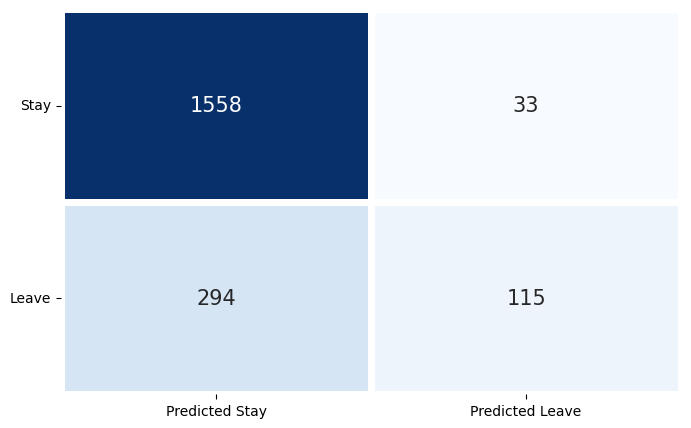

In [11]:
# Creation of the model
import keras
from keras.models import Sequential
from keras.layers import Dense

# Creation of an empty model
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Training the network 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist=classifier.fit(X_train, y_train, validation_split= 0.3, epochs = 100)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Print Statistics from Confusion Matrix
from sklearn.metrics import classification_report
target_names = ['Stay', 'Leave']
print(classification_report(y_test, y_pred, target_names=target_names))

import seaborn as sns
import matplotlib.pyplot as plt
# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Stay', 'Leave'], xticklabels = ['Predicted Stay', 'Predicted Leave'])
plt.yticks(rotation = 0)
plt.show()

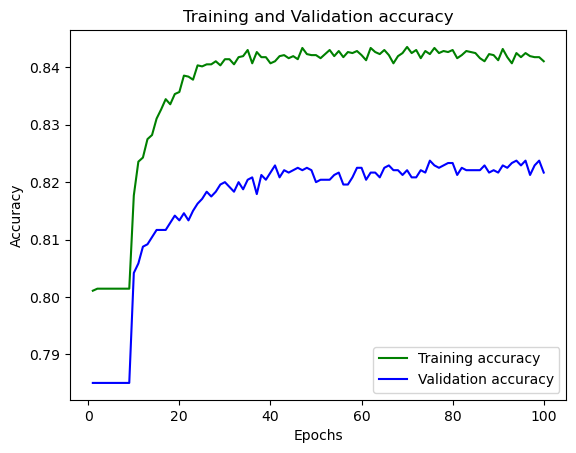

In [12]:
# Visualizing Training and Validation Accuracy
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

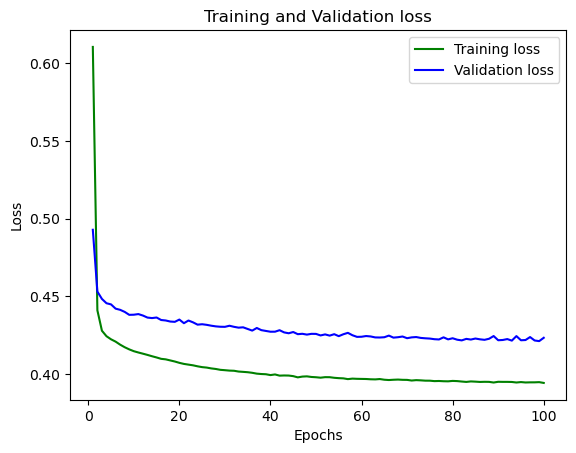

In [13]:
# Visualizing Training and Validation Loss
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

---